In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 글자 전처리를 위한 import
import string
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator 

/opt/anaconda3/envs/dipLearning/lib/python3.12/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/opt/anaconda3/envs/dipLearning/lib/python3.12/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/opt/anaconda3/envs/dipLearning/lib/python3.12/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORT

In [2]:
data = pd.read_csv("netflix_reviews.csv")

In [3]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [4]:
import re

def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r"[^\w\s']", '', text)  # 작은따옴표는 유지, 나머지 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [5]:
data["content"] = data["content"].apply(preprocess_text)
data["sentiment"] = data["content"].apply(get_sentiment)
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
sentiment_label_map = {'negative': 0, 'neutral': 1, 'positive': 2}

def map_sentiment(sentiment_labels):

    mapped = []
    for sentiment in sentiment_labels:
        mapped.append(sentiment_label_map.get(sentiment))
    
    return mapped

data["mapped_mapped_label"] = map_sentiment(data["sentiment_label"].to_list())
data["mapped_mapped_label"]

0         1
1         2
2         2
3         2
4         1
         ..
116926    2
116927    2
116928    1
116929    0
116930    2
Name: mapped_mapped_label, Length: 116931, dtype: int64

In [8]:
negative_reviews = data.loc[data["mapped_mapped_label"] == 0, "content"]

In [15]:
negative_reviews = ' '.join(negative_reviews)

In [13]:
!pip3 install wordcloud

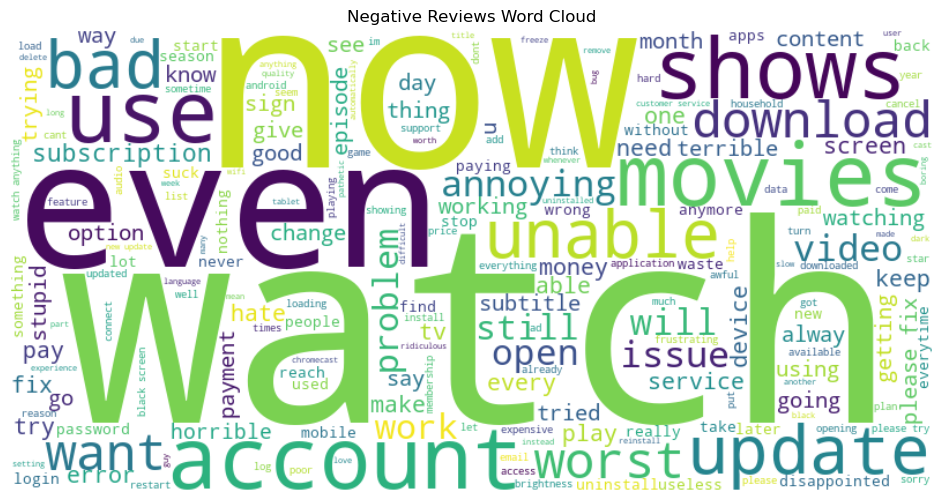

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# (선택) 불용어를 먼저 제거해주세요.
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])  # 리뷰에서 필요없는 단어는 여기 안에 추가하셔도 좋습니다.

# 부정적인 리뷰만 먼저 모아본 다음, 아래처럼 wordcloud를 그려보세요
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()